# Aula 6

Vimos que o método direto (GEM) de resolução de sistemas lineares $Ax=b$ utiliza $O(\frac{2}{3} n^3)$ flops (operações de ponto flutuante).

Veremos nessa aula que se a matriz $A$ for simétrica, é possível reduzir essa complexidade a metade, ou seja, $O(\frac{1}{3} n^3)$.

O método GEM faz a decomposição LU, $A = LU$, onde a matriz $U$ pode ser decomposta em uma diagonal $D$ e $U'$ resultando em $A = LDU'$. Se $A$ é simétrica, $A = L D U'$,  $A = LDU' = A^T = U'^T D L^T$,  multiplicando a direita por $U^{-1}$ e a esquerda por $L^{-1}$ obtemos:
$$
L^{-1} \times \overbrace{LDU'}^{A} \times U'^{-1} = L^{-1} \times \overbrace{U'^T D L^T}^{A^T} \times U'^{-1} \\
D = (L^{-1} U'^T) D (L^T U'^{-1}) \implies L^{-1} U'^T = I \text{ e } L^T U'^{-1} = I \\
\text{logo}
\left\{
\begin{array}{c}
L^T = U' \\
L = U'^T
\end{array}
\right.
$$
Concluimos que $A = LDU'$ quando $A$ é simétrica fica $A = LDL^T$


O método utilizado nesse caso é o Cholesky, mas ele requer que além de simétrica, a matriz seja definida positiva (Symmetric Positive Definite **SPD**).


### Matrizes SPD

Há várias maneiras de definir que uma matriz é SPD, uma delas é pelo produto interno.

$A$ é SPD se $\langle Ax, x \rangle > 0, \forall x \neq 0$
$$
(Ax)_i = \left(\sum_{j=1}^n a_{ij} x_j\right)_i \implies \langle Ax, x \rangle = \sum_{i=1}^n \left(\sum_{j=1}^n a_{ij} x_j \right)_i \cdot x_i = \sum_{j=1}^n x_j \sum_{i=1}^n a_{ij} x_i = \sum_{j=1}^n x_j \displaystyle \underbrace{(A^T x)_j}_{ (A^T x)_i = \sum_{i=1}^n a_{ij} x_i\ } = \displaystyle \underbrace{\langle x, A^T x \rangle}_\text{auto-adjunta}   \\
\implies \langle Ax, x \rangle = \langle x, A^T x \rangle
$$

Outra propriedade de uma matriz $A$ SPD é que $a_{ii} > 0, \forall i$. Podemos chegar a isso fazendo $\langle A e_i, e_i \rangle = a_{ii} > 0$, onde $e_i$ é elemento da base canônica. Também temos que $\text{det}(A) > 0$, como exercício verifique que $\text{det}(A_k) > 0$ (dica: indução nas submatrizes principais).

Qualquer matriz SPD satisfaz as condições da decomposição LU. 

---

Um pequeno parenteses, uma matriz é dita ser diagonal dominante por linha se $\sum_{j=1, j \neq i}^n |a_{ij}| \leq |a_{ii}|$, e por coluna se $\sum_{i=1, i \neq j}^n |a_{ij}| \leq |a_{jj}|$.

**Exercicio:** Se $A$ é diagonal dominante, então GEM pode ser aplicado sem necessidade de pivotamento. (Provado no livro do Golub pg 120 seção 3.4.10, no futuro incluirei essa prova aqui).

---
Nesse ponto da aula eu me perguntei se matrizes SPD tem um número de condição baixo o que refletiria numa matriz "estável". O código abaixo é apenas para testar empiricamente essa suposição comparando SPD com matrizes aleatorias e uma matriz de hilbert. 

Seria interessante também verificar o alinhamento entre os autovetores de tais matrizes como uma maneira a mais de compará-las. No futuro farei isso.

Número de condição da matriz de hilbert de dimensão 100: 370740532976178823168


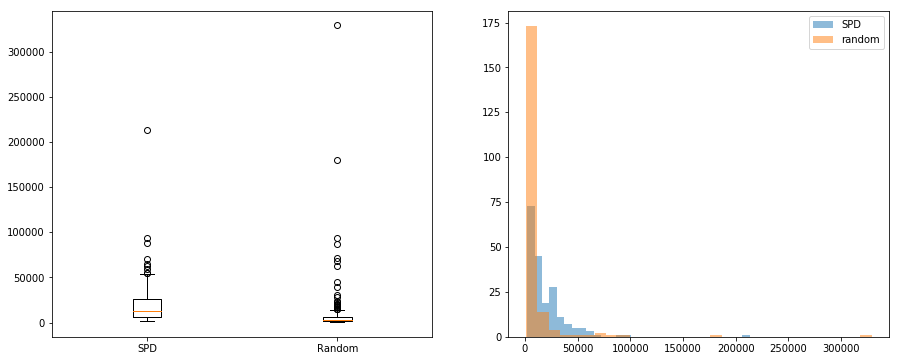

In [20]:
from sklearn.datasets import make_spd_matrix
import numpy as np
from matplotlib import pyplot as plt

dimension = 100
repetitions = 200
cond_n = np.zeros(shape=(2, repetitions))
for i in range(repetitions):
    # gera matrizes aleatoria simétricas e puramente aleatorias
    s_mat = make_spd_matrix(dimension)
    r_mat = np.random.rand(dimension, dimension)
    
    # calcula o condition number de ambas e salva num vetor
    cond_n[0, i] = np.linalg.cond(s_mat)
    cond_n[1, i] = np.linalg.cond(r_mat)

from scipy.linalg import hilbert
h_mat = hilbert(dimension)
print('Número de condição da matriz de hilbert de dimensão %d: %d'%(dimension, np.linalg.cond(h_mat)))

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.boxplot(x=[cond_n[0,:], cond_n[1,:]], labels=['SPD', 'Random'])

plt.subplot(1,2,2)
plt.hist(cond_n[0,:], bins=30, alpha=0.5, label='SPD')
plt.hist(cond_n[1, :], bins=30, alpha=0.5, label='random')
plt.legend(loc='upper right')
plt.show()

### Decomposição de Cholesky

Para uma dada matriz SPD (isso não funciona se a matriz for positiva semidefinida, é preciso que seja positiva definida), existe uma G (não única) triangular superior tal que $A = G^T G$.

$$
\begin{bmatrix}
    g_{11} & 0 & 0 & \dots  & 0 \\
    g_{12} & g_{22} & 0 & \dots  & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    g_{1n} & g_{2n} & g_{3n} & \dots  & g_{nn}
\end{bmatrix} \begin{bmatrix}
    g_{11} & g_{12} & g_{13} & \dots  & g_{1n} \\
    0 & g_{22} & g_{23} & \dots  & g_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \dots  & g_{nn}
\end{bmatrix}  = 
\begin{bmatrix}
    a_{11} & a_{12} & a_{13} & \dots  & a_{1n} \\
    a_{12} & a_{22} & a_{23} & \dots  & a_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    a_{1n} & a_{2n} & a_{3n} & \dots  & a_{nn}
\end{bmatrix}
$$

Os elementos da diagonal dão vários graus de liberdade, por isso $G$ não é única.
$$
g_{11} \cdot g_{11} = a_{11}\\
(-g_{11}) (-g_{11}) = a_{11}
$$

Fixando a primeira linha de $G^T$ temos:
- $g_{11}^2 = a_{11} \implies g_{11} = \pm \sqrt{a_{11}}$
- $g_{11} \cdot g_{1j} = a_{1j} \implies g_{1j} = \displaystyle \frac{a_{1j}}{g_{11}}$

Fixando a segunda linha:
- $g_{12} \cdot g_{11} = \overbrace{a_{12}}^{\displaystyle a_{12} = a_{21}} \implies g_{12} = \displaystyle \frac{a_{12}}{g_{11}}$. Essa conta já foi feita no passo anterior, então precisamos continuar a partir de $g_{22}$

- $g_{12}^2 \cdot g_{22}^2 = a_{22} \implies g_{22} = \pm \sqrt{a_{22} - g_{12}^2}$. Essa raíz está bem definida pois o determinante da submatriz principal $A_2 > 0$, como $A$ é SPD temos que $\text{det}(A_k) >0$:
$$
a_{22} - g_{12}^2 = a_{22} - \frac{a_{12}^2}{g_{11}^2} = \frac{a_{11} \cdot a_{22} - a_{12}^2}{a_{11}} > 0, \text{ pois det}(A_2) >0 \text{ e det}(A_2) = \frac{a_{11} \cdot a_{22} - a_{12}^2}{a_{11}}  
$$

- Próximas colunas: $g_{12} \cdot \overbrace{g_{1j}}^\text{já calculado} + g_{22} \overbrace{g_{2j}}^\text{desconhecido} = a_{2j} \implies g_{2j} = \displaystyle \frac{a_{2j} - g_{12} \cdot g_{1j}}{g_{22}}, j=3 \ldots n$


Resumindo:

$i=1, \;\; g_{11} = \sqrt{a_{11}}, \;\; g_{1j} = \displaystyle \frac{a_{1j}}{g_{11}}, j=2 \ldots n$

$i=2, \;\; g_{22} = \sqrt{a_{22} - g_{12}^2}, \;\; g_{2j} = \displaystyle \frac{a_{2j} - g_{12} \cdot g_{1j} }{g_{22}}, j=3 \ldots n$

$\vdots$

$i=k, \;\; g_{1k}^2 + g_{2k}^2 + \cdots + g_{kk}^2 = a_{kk} \implies g_{kk} = \pm \sqrt{a_{kk} - \sum_{i=1}^{k-1} g_{ik}^2}$

Para $j>k g_{1k} \cdot g_{1j} + g_{2k} \cdot g_{2j} + \cdots + g_{kk} \cdot \overbrace{g_{kj}}^{desconhecido} = a_{kj} \implies $
$$ g_{kj} = \displaystyle  \frac{a_{kj} - \sum_{i=1}^{k-1} g_{ik} \cdot g_{ij} }{g_{kk}}, j=k+1, \ldots n $$

---

Com isso temos o seguinte algoritmo para a decomposição Cholesky:

ALGORITMO


---
A complexidade desse algoritmo é $O(1/2 n^3)$ (exercício: verificar, assumir $\sqrt$ utilize 1 flop) 

Com isso terminamos a parte dos métodos diretos de resolução de sistemas lineares, agora iremos para a parte de análise de erro.